# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the dataset
df = pd.read_csv('Loan_Status.csv')

# Data Cleaning

In [3]:
#Printing the first and last five rows of the dataset
print(f"First five rows of the dataset:\n{df.head()}")
print(f"Last five rows of the dataset:\n{df.tail()}")

First five rows of the dataset:
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural   

In [4]:
#Checking the shape of the dataset
print(f"Shape Of the data:{df.shape}")


Shape Of the data:(614, 13)


In [5]:
#Columns in the dataset
print(f"Columns in the dataset:\n{df.columns}")

Columns in the dataset:
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [6]:
#Dropping the Loan_ID column as it is not useful for analysis
df.drop('Loan_ID', axis=1, inplace=True)

In [7]:
#if there are any missing values in the dataset
print(f"Missing values in the dataset:\n{df.isnull().sum()}")

Missing values in the dataset:
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [8]:
#Percentage of missing values in the dataset
print("Percentage of missing values in the dataset:")
print((df.isnull().sum()/df.shape[0])*100)

Percentage of missing values in the dataset:
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64


In [9]:
#Data Types of the columns
print(f"Data Types of the columns:\n{df.dtypes}")

Data Types of the columns:
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


In [10]:
#Description of the dataset
print(f"Description of the dataset:\n{df.describe()}")

Description of the dataset:
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


In [11]:
#Printing the columns that have missing values
print(f"Columns with missing values:\n{df.columns[df.isnull().any()]}")
print(f"Length of columns with missing values:{len(df.columns[df.isnull().any()])}")

Columns with missing values:
Index(['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')
Length of columns with missing values:7


In [12]:
#We will use Random Forest to fill the missing values of Credit_History
from sklearn.ensemble import RandomForestClassifier
#Separating the rows with missing values and without missing values
df_with_na = df[df['Credit_History'].isnull()]
df_without_na = df[df['Credit_History'].notnull()]
#Features and target variable
features = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Loan_Status']
label = ['Credit_History']
#Encoding categorical variables
df_with_na['Loan_Status'] = df_with_na['Loan_Status'].map({'Y':1,'N':0})
df_without_na['Loan_Status'] = df_without_na['Loan_Status'].map({'Y':1,'N':0}) 
X = df_without_na[features]
y = df_without_na[label]
#Training the model
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X, y.values.ravel())
#Predicting the missing values
predicted = rfc.predict(df_with_na[features])
#Filling the missing values
df.loc[df['Credit_History'].isnull(), 'Credit_History'] = predicted
#Checking if there are any missing values in Credit_History
df['Credit_History'].isnull().sum()

np.int64(0)

In [13]:
#Handling Missing Values of Gender
df['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [14]:
#Filling missing in Gender with mode
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Gender'].value_counts()

Gender
Male      502
Female    112
Name: count, dtype: int64

In [15]:
#Filling missing in Married with mode
df['Married'].fillna(df['Married'].mode()[0], inplace=True)

In [16]:
#Filling missing in Self_Employed with mode
print(f"{df['Self_Employed'].value_counts()}")
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
print(f"{df['Self_Employed'].value_counts()}")

Self_Employed
No     500
Yes     82
Name: count, dtype: int64
Self_Employed
No     532
Yes     82
Name: count, dtype: int64


In [17]:
#Filling missing in married 
print(f"{df['Dependents'].value_counts()}")
#if married and dependents is null then fill with 1 else if dependents is null fill with 0 else keep the value as it is
df['Dependents'] = df.apply(lambda row: '1' if row['Married'] == 'Yes' and pd.isnull(row['Dependents']) else '0' if pd.isnull(row['Dependents']) else row['Dependents'], axis=1)
print(f"{df['Dependents'].value_counts()}")

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64
Dependents
0     349
1     113
2     101
3+     51
Name: count, dtype: int64


In [18]:
#Filling missing in Loan Amount with mean
print(f"{df['LoanAmount'].mean()}")
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)


146.41216216216216


In [19]:
df['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [20]:
#Filling missing of Loan_Amount_Term with mode
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [21]:
#Saving the cleaned dataset to a new CSV file
df.to_csv('Cleaned_Loan_Status.csv', index=False)

# EDA

In [22]:
#Finding the categorical and numerical columns 
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print(f"Categorical columns in the dataset:\n{categorical_columns}")
print(f"Numerical columns in the dataset:\n{numerical_columns}")

Categorical columns in the dataset:
Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')
Numerical columns in the dataset:
Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')


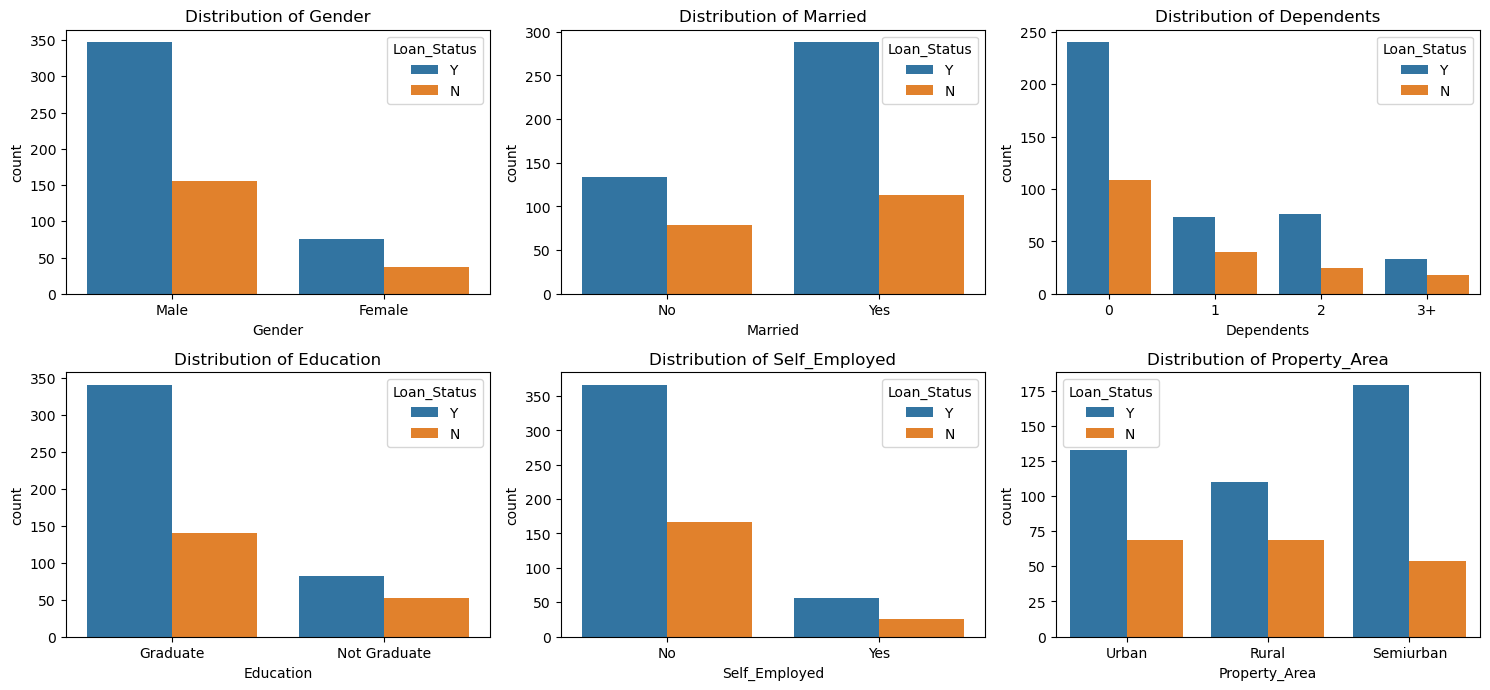

In [23]:
plt.figure(figsize=(15, 10))
# Exclude 'Loan_Status' from features to plot
cols_to_plot = [col for col in categorical_columns if col != 'Loan_Status']
for i, col in enumerate(cols_to_plot):
    plt.subplot(3, 3, i+1)
    sns.countplot(data=df, x=col, hue='Loan_Status')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

<!-- write the insights -->

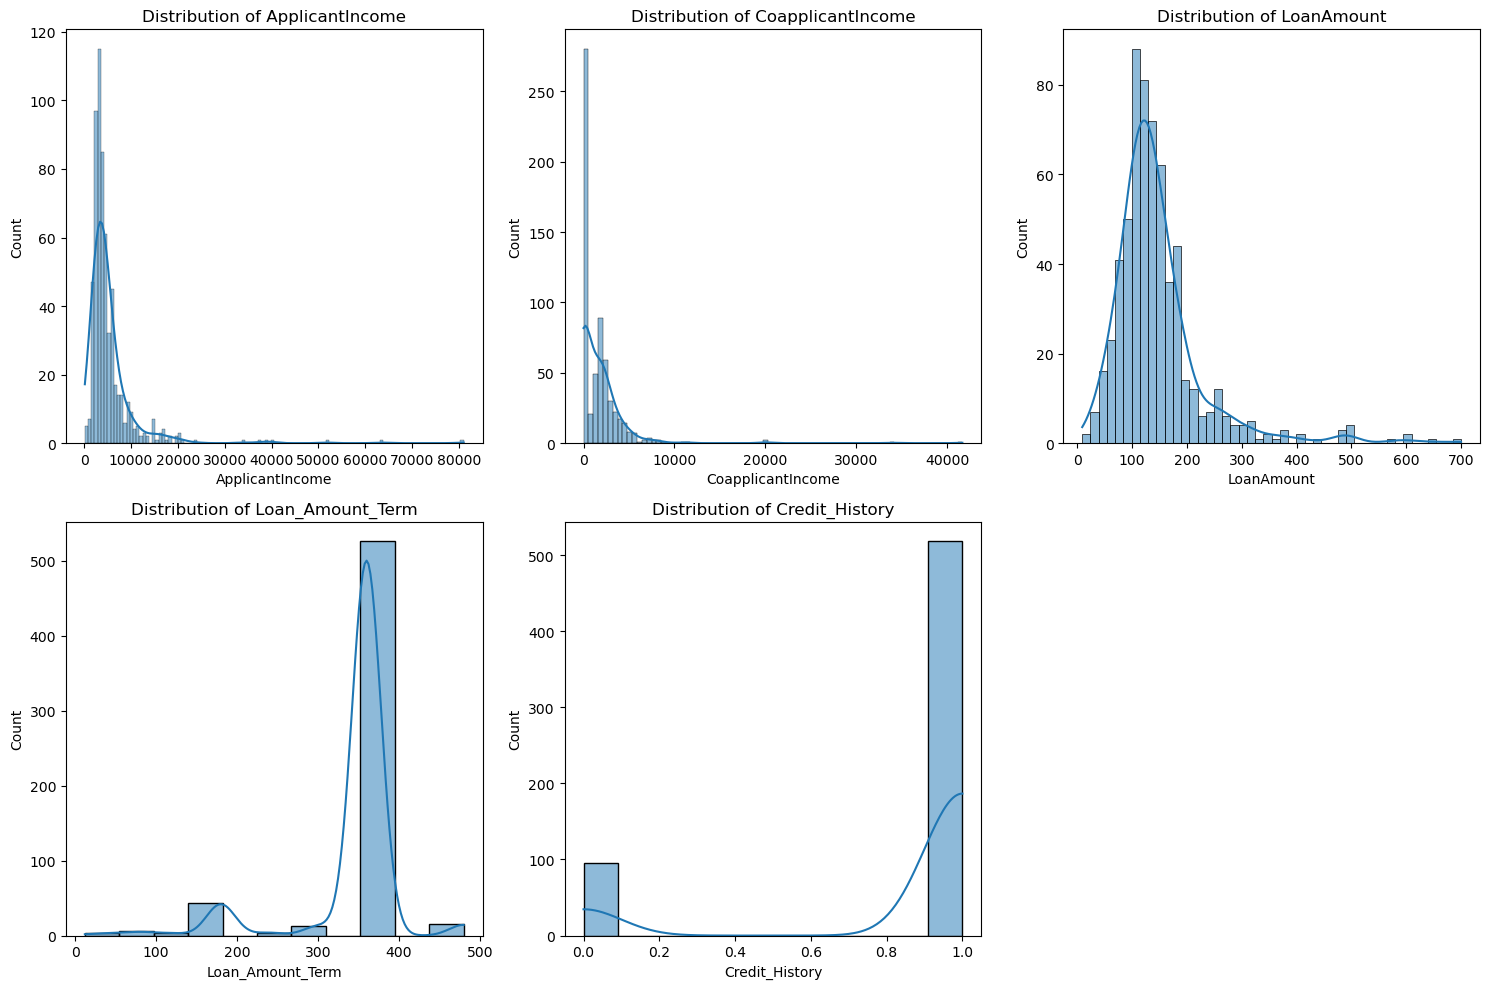

In [24]:
#Plotting thr distribution of numerical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 3, i+1)
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

<!-- write insights -->

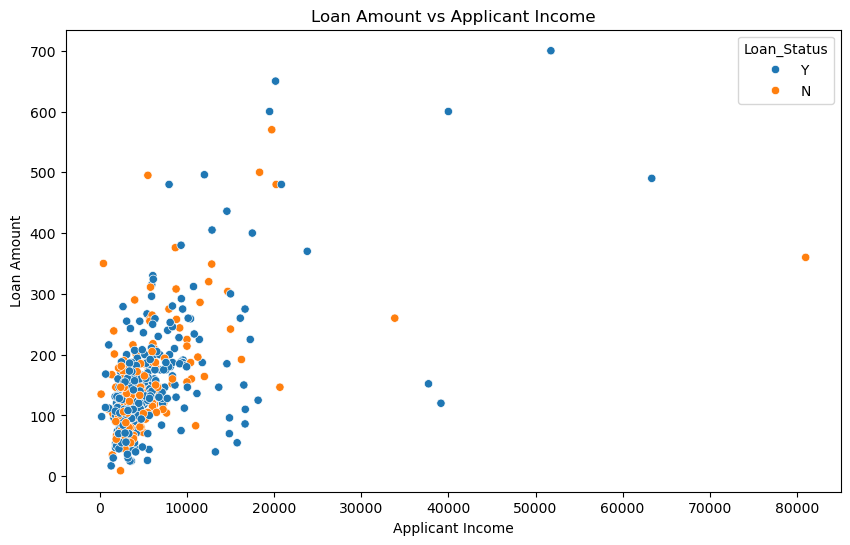

In [25]:
#Plot loan amount vs applicant income
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='ApplicantIncome', y='LoanAmount', hue='Loan_Status')
plt.title('Loan Amount vs Applicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.show()

<!-- write the insights -->

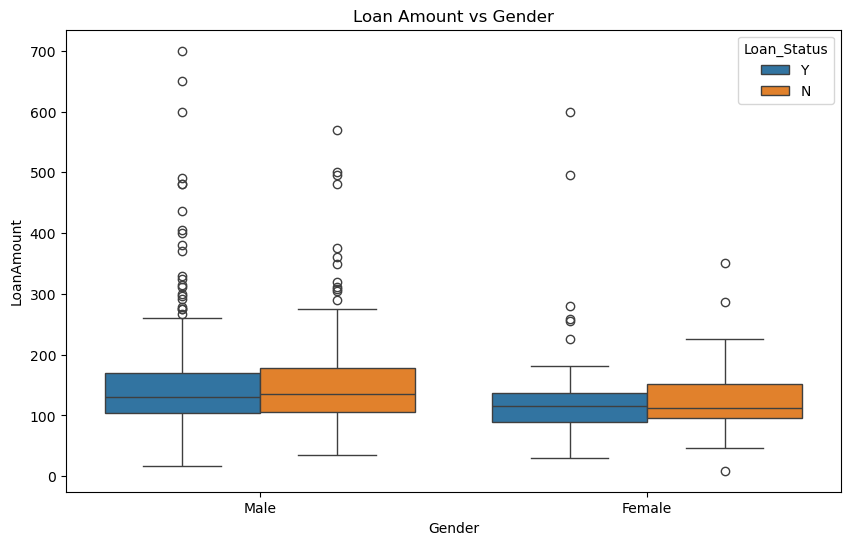

In [26]:
#Plot Loan Amount vs Gender
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x = 'Gender', y = 'LoanAmount', hue='Loan_Status')
plt.title('Loan Amount vs Gender')
plt.show()

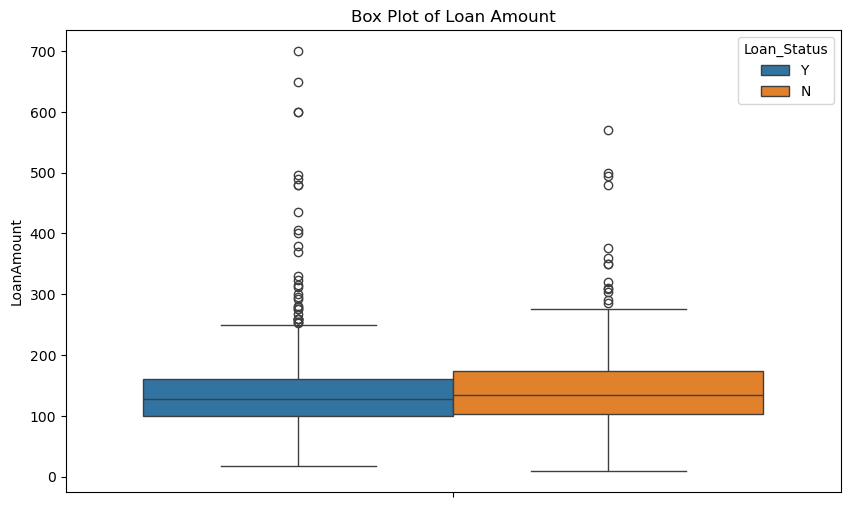

In [27]:
#Plot Box Plot of Loan Amount 
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='LoanAmount', hue='Loan_Status')
plt.title('Box Plot of Loan Amount')
plt.show()

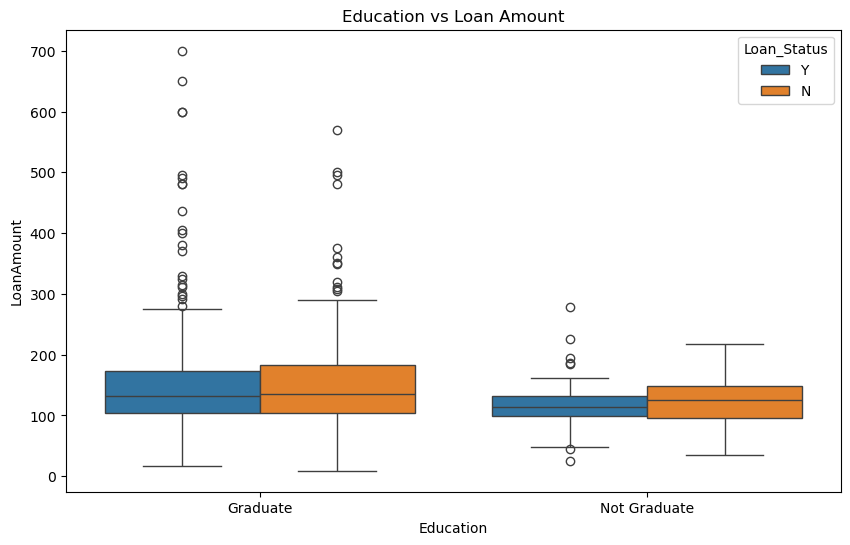

In [28]:
#Plot Education vs Loan Amount
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Education', y='LoanAmount', hue='Loan_Status')
plt.title('Education vs Loan Amount')
plt.show()

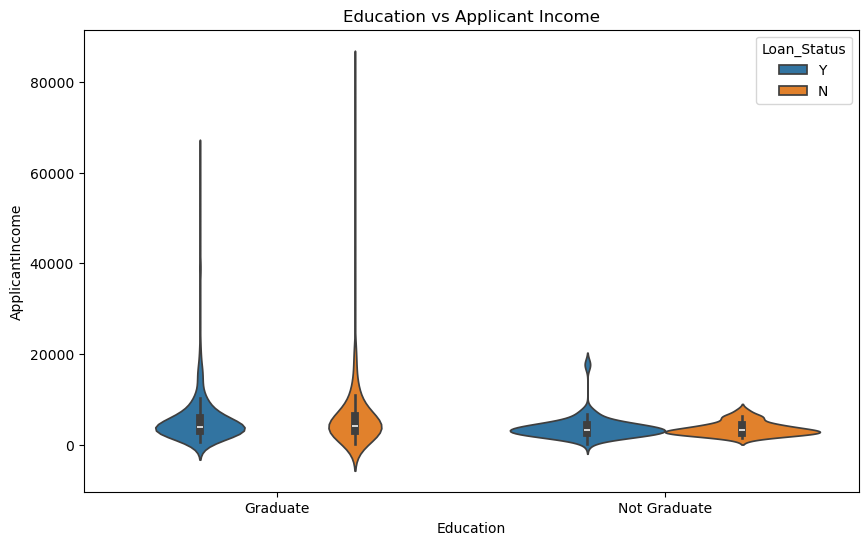

In [29]:
#Plot Education vs applicant Income
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Education', y='ApplicantIncome', hue='Loan_Status')
plt.title('Education vs Applicant Income')
plt.show()


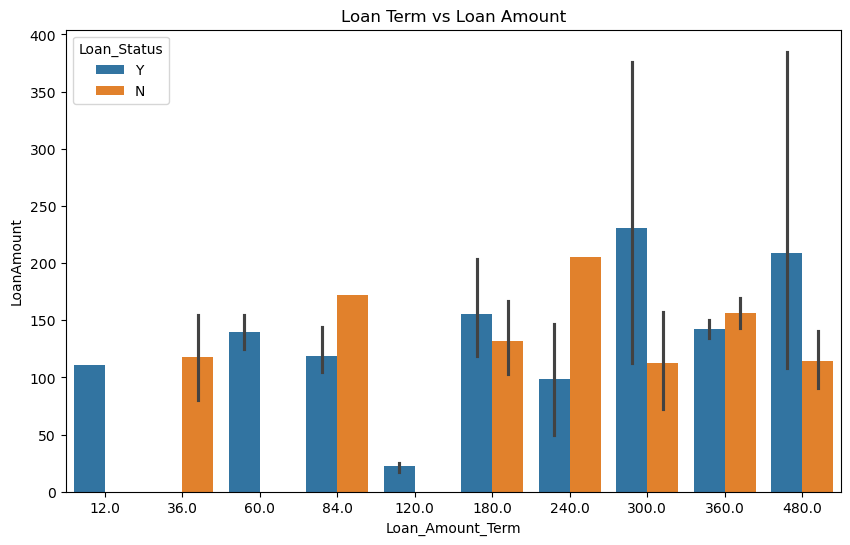

In [30]:
#Plot Loan term vs Loan Amount
plt.figure(figsize=(10, 6)) 
sns.barplot(data=df, x='Loan_Amount_Term', y='LoanAmount', hue='Loan_Status')
plt.title('Loan Term vs Loan Amount')
plt.show()

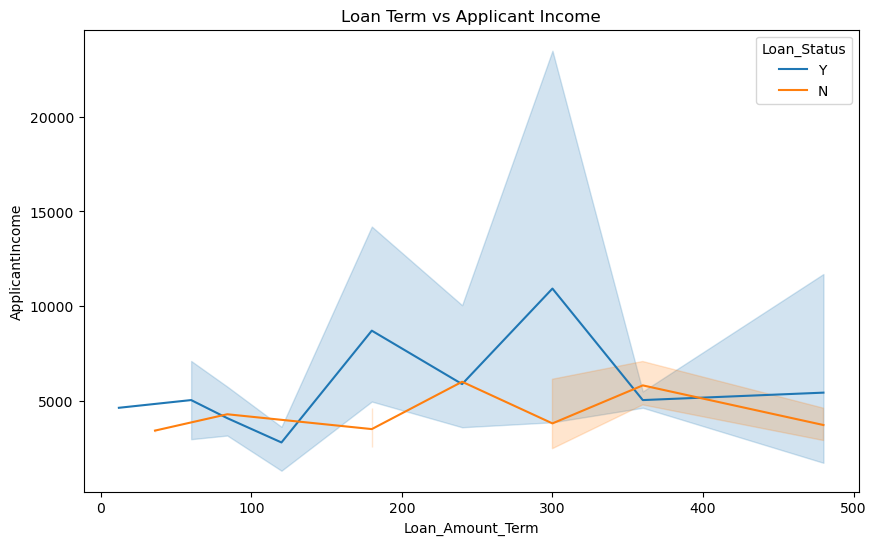

In [31]:
#Plot Loan Term vs Applicant Income
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Loan_Amount_Term', y='ApplicantIncome', hue='Loan_Status')
plt.title('Loan Term vs Applicant Income')
plt.show()

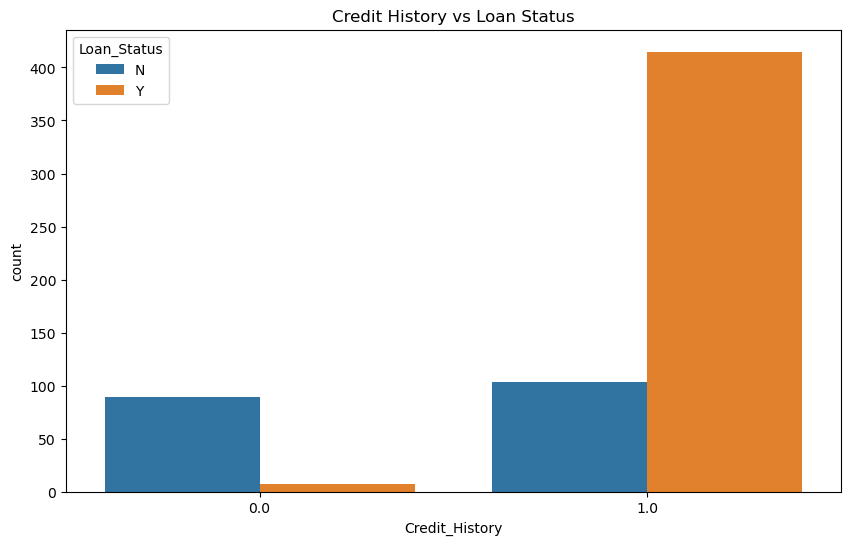

In [32]:
#Plot Credit History vs Loan Status
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Credit_History', hue='Loan_Status')
plt.title('Credit History vs Loan Status')
plt.show()

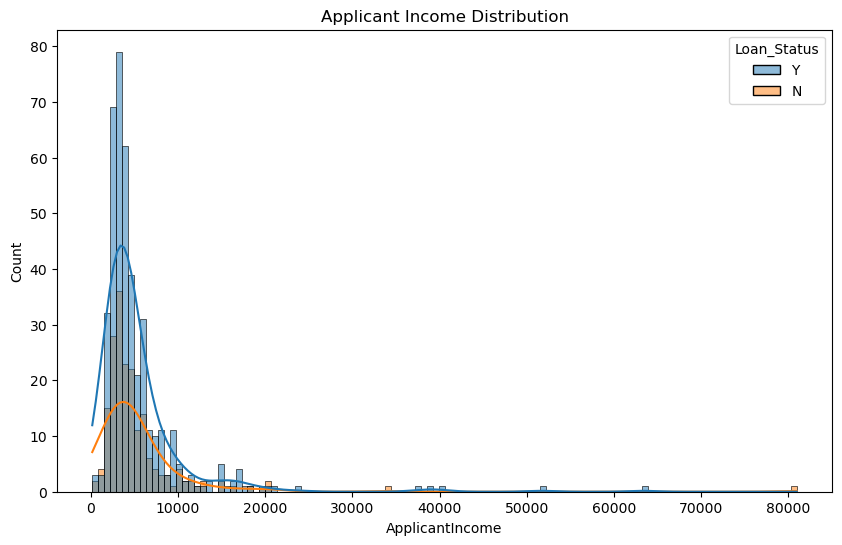

In [33]:
#Plot applicant Income in histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='ApplicantIncome', kde=True, hue='Loan_Status')
plt.title('Applicant Income Distribution')
plt.show()

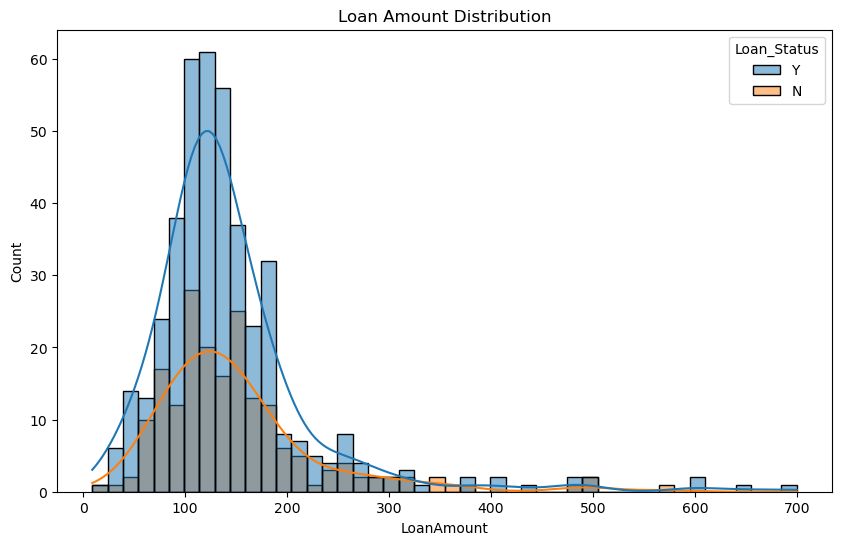

In [34]:
#Plot Loan Amount in histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='LoanAmount', kde=True, hue='Loan_Status')
plt.title('Loan Amount Distribution')
plt.show()

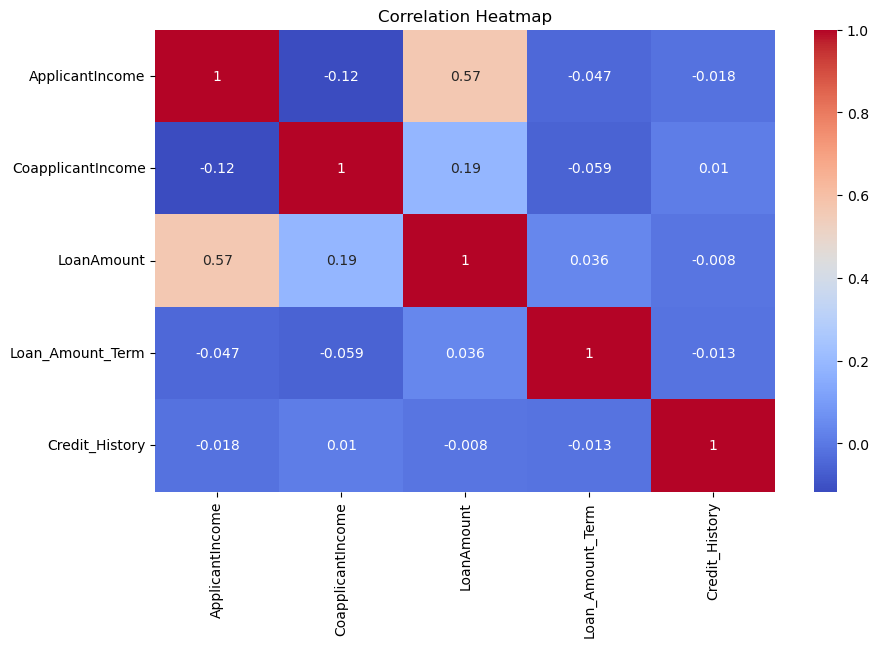

In [35]:
#Plot the correlation heatmap
df_numeric = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<!-- write the insights -->